## Defs / Imports

In [1]:
import disjointification
from pathlib import Path
import matplotlib.pyplot as plt
import scienceplots
import shutil
import seaborn as sns
import numpy as np
plt.style.use(['science', 'notebook'])

## Load Saved Model

In [2]:
# save_point = Path(r"\model\06_24_2023__18_27_55\06_24_2023__18_27_55.pkl") # savepoint with 500 features
save_point = Path(r"\model\07_01_2023__03_54_19\07_01_2023__03_54_19.pkl") # savepoint with 2500 features

test = disjointification.from_file(save_point)
test.describe()

Disjointification Test Description
features data: (3069, 9260)
labels data: (3069, 2)
min num of features to keep in disjointification: 2500
correlation threshold: 0.7
last save point: c:\model\07_01_2023__03_54_19\07_01_2023__03_54_19.pkl


# Linear Prediction as a function of number of features kept, worst features selected first

<Figure size 432x288 with 0 Axes>

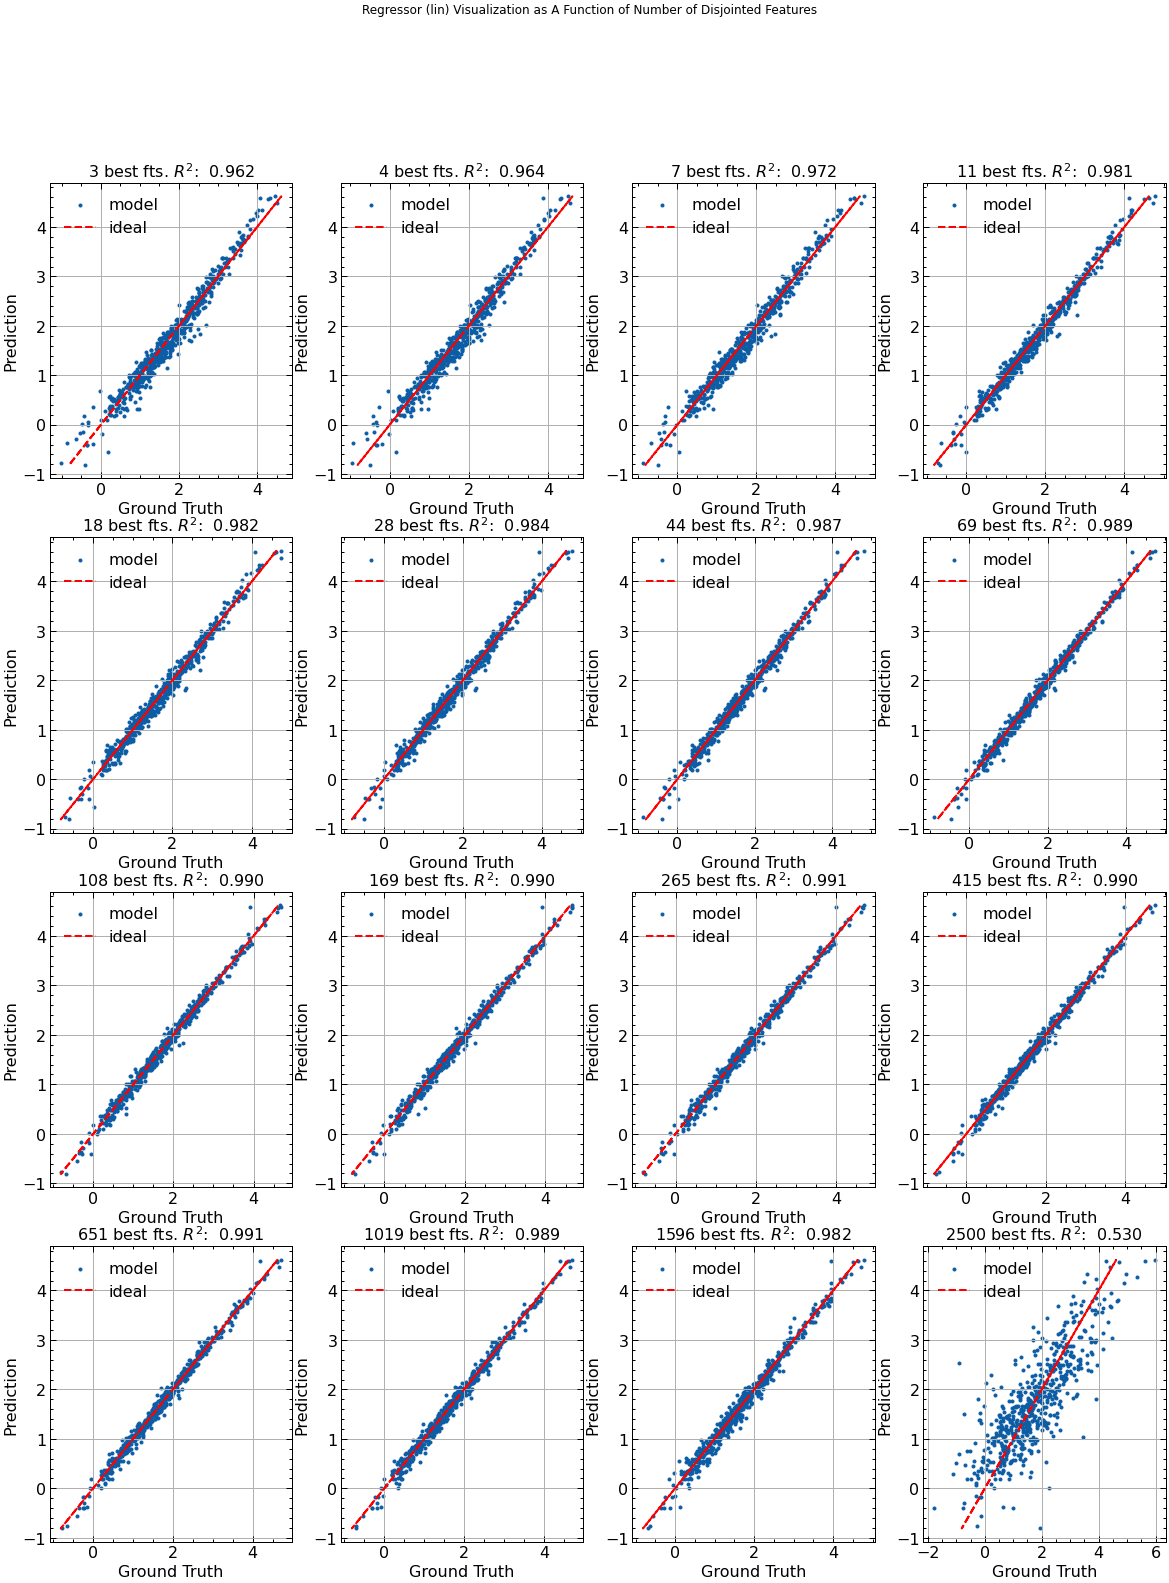

<Figure size 432x288 with 0 Axes>

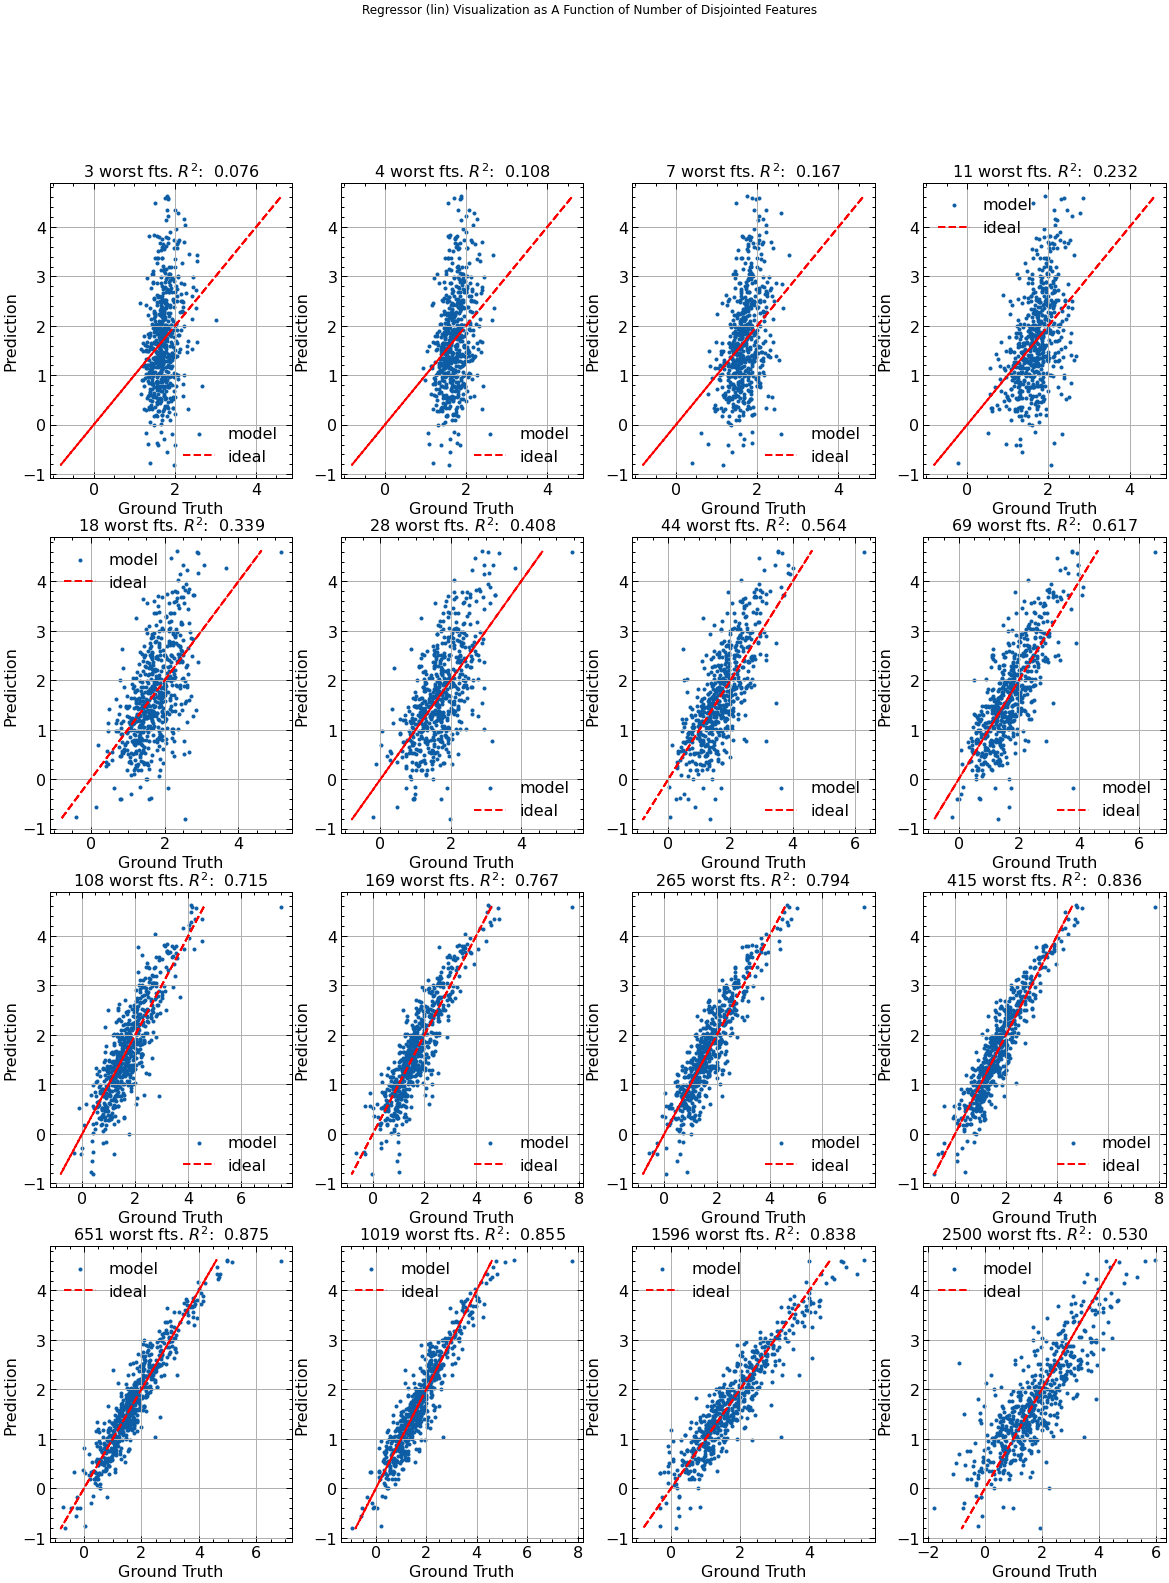

In [3]:
test.sweep_regression_plot(mode='lin')
test.sweep_regression_plot(mode='lin', order=-1)

In [4]:
# test.sweep_regression_plot(mode='log')
# test.sweep_regression_plot(mode='log', order=-1)

In [9]:
test.init_scores_df()
test.sweep_regression_scores(num_sweep=150, mode='lin')

In [10]:
test.sweep_regression_scores(num_sweep=150, mode='log')

C:\Users\oDror\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\oDror\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

<Figure size 432x288 with 0 Axes>

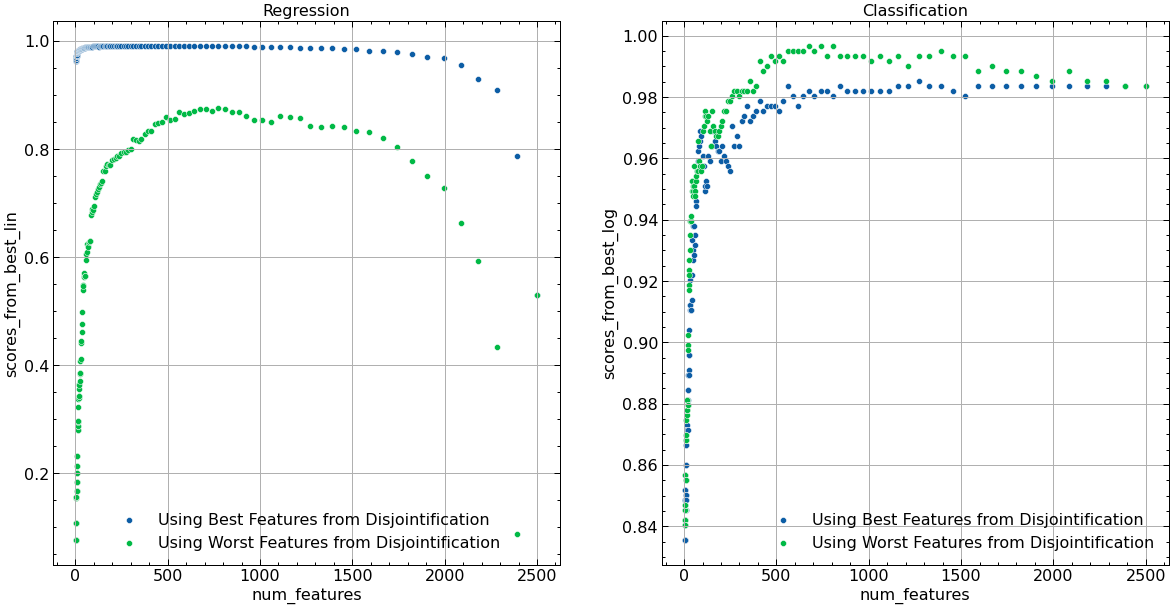

In [11]:
plt.figure()
fig, axs = plt.subplots(1,2, figsize=(20,10))
data = test.scores_df

ax = axs.flatten()[0]
ax.set_title("Regression")
sns.scatterplot(data=data, y="scores_from_best_lin", x="num_features", ax=ax, label="Using Best Features from Disjointification")
sns.scatterplot(data=data,y="scores_from_worst_lin", x="num_features", ax=ax, label="Using Worst Features from Disjointification")
ax.grid('minor')

ax = axs.flatten()[1]
ax.set_title("Classification")
sns.scatterplot(data=data, y="scores_from_best_log", x="num_features", ax=ax, label="Using Best Features from Disjointification")
sns.scatterplot(data=data,y="scores_from_worst_log", x="num_features", ax=ax, label="Using Worst Features from Disjointification")
ax.grid('minor')